In [727]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf

In [728]:
def adam_optimizer(W, b, dW, db, m_W, v_W, m_b, v_b, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m_W = beta1 * m_W + (1 - beta1) * dW
    v_W = beta2 * v_W + (1 - beta2) * (dW ** 2)
    m_b = beta1 * m_b + (1 - beta1) * db
    v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

    m_W_hat = m_W / (1 - beta1 ** t)
    v_W_hat = v_W / (1 - beta2 ** t)
    m_b_hat = m_b / (1 - beta1 ** t)
    v_b_hat = v_b / (1 - beta2 ** t)

    W -= learning_rate * m_W_hat / (np.sqrt(v_W_hat) + epsilon)
    b -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

    return W, b, m_W, v_W, m_b, v_b

In [729]:
def initialize_parameters(input_size, hidden_layer_1, hidden_layer_2, output_size):
    W1 = np.random.randn(input_size, hidden_layer_1) * 0.01
    b1 = np.zeros((1, hidden_layer_1))
    W2 = np.random.randn(hidden_layer_1, hidden_layer_2) * 0.01
    b2 = np.zeros((1, hidden_layer_2))
    W3 = np.random.randn(hidden_layer_2, output_size) * 0.01
    b3 = np.zeros((1, output_size))
    
    return W1, b1, W2, b2, W3, b3

In [730]:
def relu(Z):
    return np.maximum(0, Z)

In [731]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [732]:
def compute_loss(A3, Y):
    m = Y.shape[0]
    loss = -np.mean(Y * np.log(A3 + 1e-8) + (1 - Y) * np.log(1 - A3 + 1e-8))
    return loss

In [733]:
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)
    return Z1, A1, Z2, A2, Z3, A3

In [734]:
def backpropagation(X, Y, Z1, A1, Z2, A2, Z3, A3, W1, W2, W3):
    m = X.shape[0]
    
    dZ3 = A3 - Y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m
    
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * (Z2 > 0)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2, dW3, db3

In [735]:
def train_neural_network(X_train, Y_train, X_test, Y_test, input_size, hidden_layer_1, hidden_layer_2, output_size, epochs=5000, learning_rate=0.001):
    W1, b1, W2, b2, W3, b3 = initialize_parameters(input_size, hidden_layer_1, hidden_layer_2, output_size)
    
    m_W1, v_W1, m_b1, v_b1 = np.zeros_like(W1), np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(b1)
    m_W2, v_W2, m_b2, v_b2 = np.zeros_like(W2), np.zeros_like(W2), np.zeros_like(b2), np.zeros_like(b2)
    m_W3, v_W3, m_b3, v_b3 = np.zeros_like(W3), np.zeros_like(W3), np.zeros_like(b3), np.zeros_like(b3)
    
    for epoch in range(epochs):
        Z1, A1, Z2, A2, Z3, A3 = forward_pass(X_train, W1, b1, W2, b2, W3, b3)
        
        loss = compute_loss(A3, Y_train)
        
        dW1, db1, dW2, db2, dW3, db3 = backpropagation(X_train, Y_train, Z1, A1, Z2, A2, Z3, A3, W1, W2, W3)
        
        W1, b1, m_W1, v_W1, m_b1, v_b1 = adam_optimizer(W1, b1, dW1, db1, m_W1, v_W1, m_b1, v_b1, epoch+1, learning_rate)
        W2, b2, m_W2, v_W2, m_b2, v_b2 = adam_optimizer(W2, b2, dW2, db2, m_W2, v_W2, m_b2, v_b2, epoch+1, learning_rate)
        W3, b3, m_W3, v_W3, m_b3, v_b3 = adam_optimizer(W3, b3, dW3, db3, m_W3, v_W3, m_b3, v_b3, epoch+1, learning_rate)
        
        if epoch % 1000 == 0:
            print(f"Epoch {epoch+1000}, Loss: {loss:.4f}")
    
    Z1_test, A1_test, Z2_test, A2_test, Z3_test, A3_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
    return A3_test

In [736]:
def initialize_parameters(input_size, hidden_size1, hidden_size2, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size1)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2)
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size)
    b3 = np.zeros((1, output_size))
    return W1, b1, W2, b2, W3, b3

In [737]:
df = pd.read_csv('huge_1M_titanic (1).csv')

In [738]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1310,1,1,"Name1310, Miss. Surname1310",female,NaN,0,0,SOTON/O2 3101272,76.760165,NaN,C
1,1311,0,3,"Name1311, Col. Surname1311",male,29.0,0,0,223596,10.193097,NaN,S
2,1312,0,3,"Name1312, Mr. Surname1312",male,20.0,0,0,54636,12.029416,C83,C
3,1313,0,3,"Name1313, Mr. Surname1313",male,27.0,0,0,PC 17760,13.429448,NaN,S
4,1314,0,3,"Name1314, Mr. Surname1314",male,32.0,0,0,364512,4.840769,E33,C


In [739]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   PassengerId  1000000 non-null  int64  
 1   Survived     1000000 non-null  int64  
 2   Pclass       1000000 non-null  int64  
 3   Name         1000000 non-null  object 
 4   Sex          1000000 non-null  object 
 5   Age          801400 non-null   float64
 6   SibSp        1000000 non-null  int64  
 7   Parch        1000000 non-null  int64  
 8   Ticket       1000000 non-null  object 
 9   Fare         1000000 non-null  float64
 10  Cabin        229805 non-null   object 
 11  Embarked     997760 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 91.6+ MB


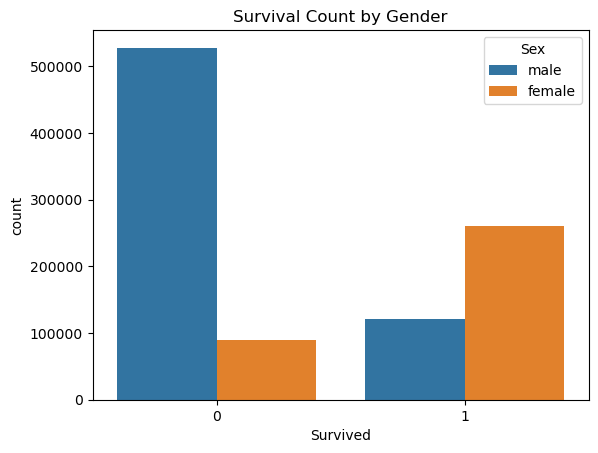

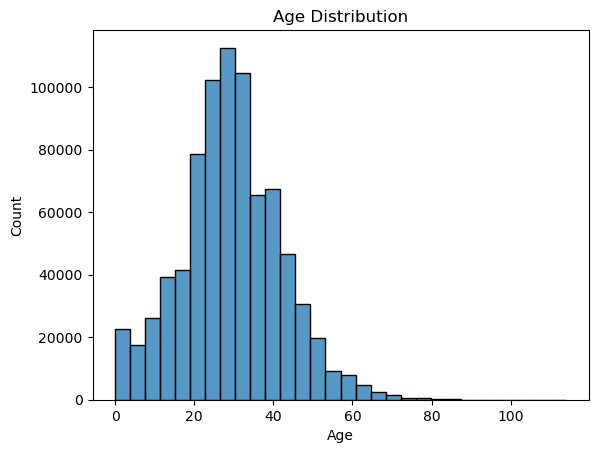

In [740]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title("Survival Count by Gender")
plt.show()
sns.histplot(df['Age'].dropna(), bins=30)
plt.title("Age Distribution")
plt.show()

In [741]:
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
print(null_columns)

Age         198600
Cabin       770195
Embarked      2240
dtype: int64


In [742]:
df = df.drop(['Cabin'], axis=1)

In [743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   PassengerId  1000000 non-null  int64  
 1   Survived     1000000 non-null  int64  
 2   Pclass       1000000 non-null  int64  
 3   Name         1000000 non-null  object 
 4   Sex          1000000 non-null  object 
 5   Age          801400 non-null   float64
 6   SibSp        1000000 non-null  int64  
 7   Parch        1000000 non-null  int64  
 8   Ticket       1000000 non-null  object 
 9   Fare         1000000 non-null  float64
 10  Embarked     997760 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.9+ MB


In [744]:
df = df[df['Age'].notna()]

In [745]:
df = df[df['Embarked'].notna()]

In [746]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799603 entries, 1 to 999999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  799603 non-null  int64  
 1   Survived     799603 non-null  int64  
 2   Pclass       799603 non-null  int64  
 3   Name         799603 non-null  object 
 4   Sex          799603 non-null  object 
 5   Age          799603 non-null  float64
 6   SibSp        799603 non-null  int64  
 7   Parch        799603 non-null  int64  
 8   Ticket       799603 non-null  object 
 9   Fare         799603 non-null  float64
 10  Embarked     799603 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 73.2+ MB


In [747]:
label_encoder = LabelEncoder()

In [748]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [749]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,1311,0,3,28389,1,29.0,0,0,108,10.193097,2
2,1312,0,3,28477,1,20.0,0,0,495,12.029416,0
3,1313,0,3,28560,1,27.0,0,0,613,13.429448,2
4,1314,0,3,28652,1,32.0,0,0,431,4.840769,0
5,1315,1,3,28743,0,0.0,0,0,240,14.805817,2


In [750]:
correlations = df.corr()['Embarked'].sort_values(ascending=False)

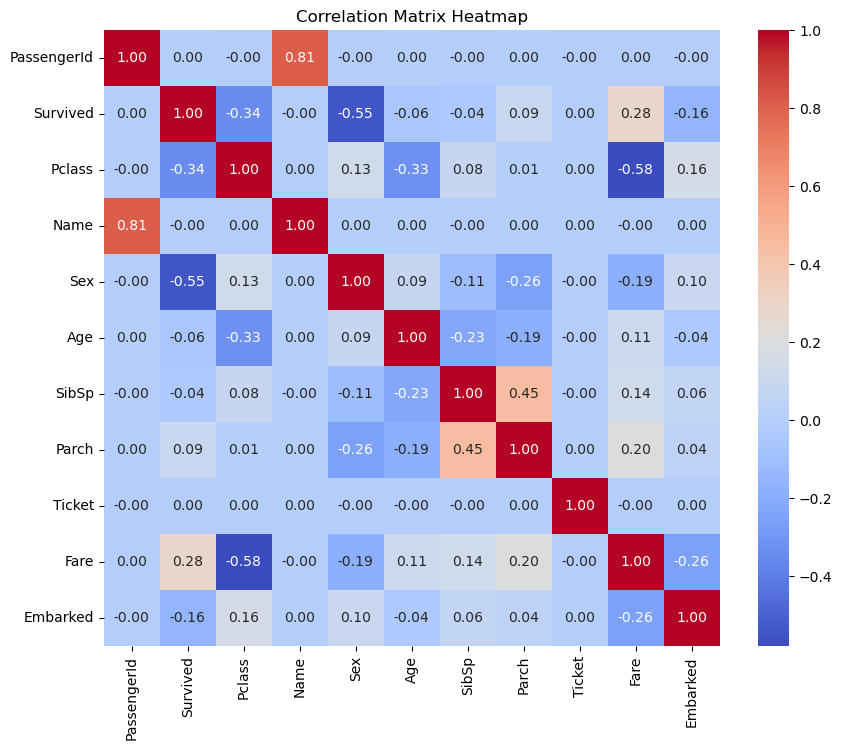

In [751]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [752]:
print(correlations)

Embarked       1.000000
Pclass         0.158478
Sex            0.098827
SibSp          0.063573
Parch          0.040708
Ticket         0.000931
Name           0.000710
PassengerId   -0.000197
Age           -0.038922
Survived      -0.157446
Fare          -0.256713
Name: Embarked, dtype: float64


C:\Users\eyadm\AppData\Local\Temp\ipykernel_1984\2646975595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


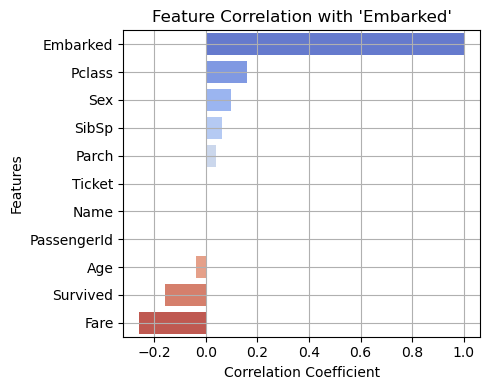

In [753]:
plt.figure(figsize=(5, 4))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title("Feature Correlation with 'Embarked'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()

In [754]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [755]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,1,29.0,0,0,10.193097,2
2,0,3,1,20.0,0,0,12.029416,0
3,0,3,1,27.0,0,0,13.429448,2
4,0,3,1,32.0,0,0,4.840769,0
5,1,3,0,0.0,0,0,14.805817,2


In [756]:
for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Survived: 0 outliers
Pclass: 0 outliers
Sex: 0 outliers
Age: 8686 outliers
SibSp: 41127 outliers
Parch: 185786 outliers
Fare: 91818 outliers
Embarked: 0 outliers


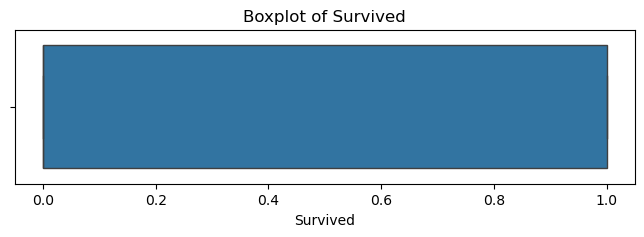

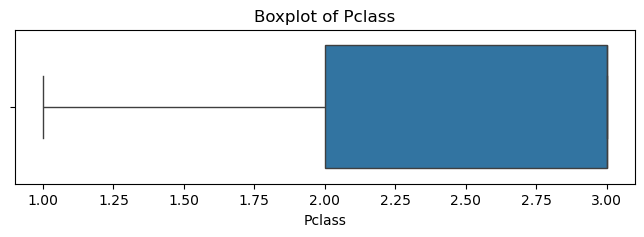

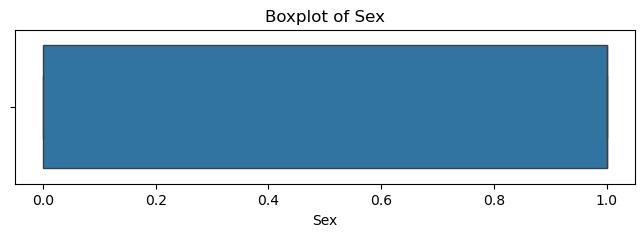

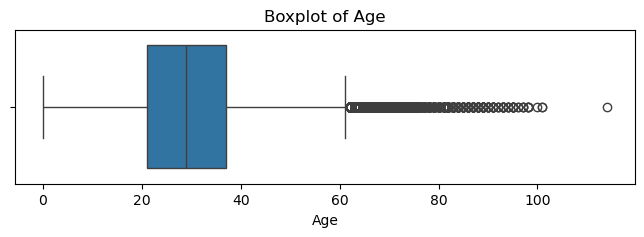

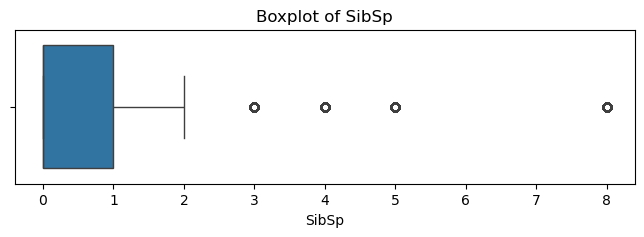

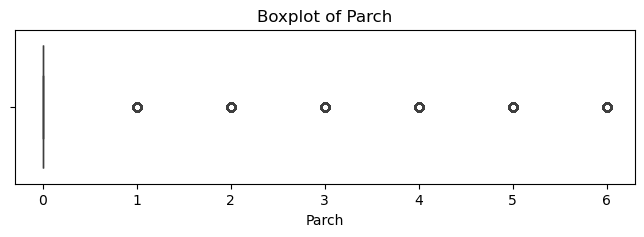

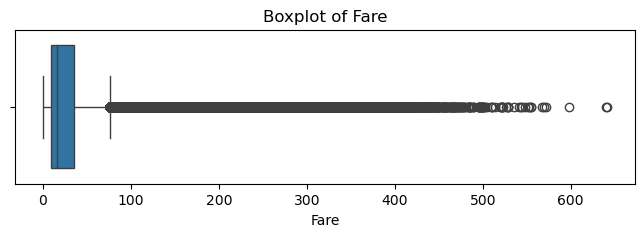

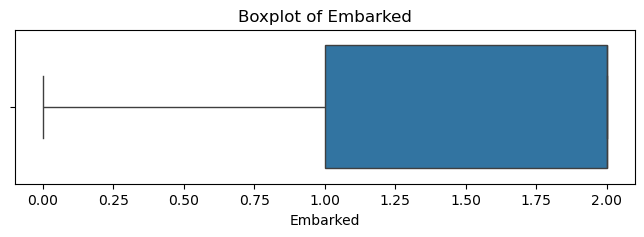

In [757]:
for col in df.columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [758]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398159 entries, 1 to 999998
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  398159 non-null  int64  
 1   Pclass    398159 non-null  int64  
 2   Sex       398159 non-null  int32  
 3   Age       398159 non-null  float64
 4   SibSp     398159 non-null  int64  
 5   Parch     398159 non-null  int64  
 6   Fare      398159 non-null  float64
 7   Embarked  398159 non-null  int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 24.3 MB


In [760]:
df = df.sample(n=10000, random_state=42)

In [761]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
678181,1,1,1,45.0,0,0,19.538804,2
44586,0,2,1,24.0,0,0,0.000000,2
679982,1,3,0,34.0,0,0,9.322324,2
467048,0,3,1,25.0,0,0,4.815800,2
312941,0,2,1,33.0,0,0,0.000000,2


In [762]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [763]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [764]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.to_numpy().reshape(-1, 1), test_size=0.2, random_state=42)

In [765]:
input_size = X_train.shape[1] 
hidden_layer_1 = 20            
hidden_layer_2 = 10            
output_size = 1                
epochs = 5000                  
learning_rate = 0.001 

In [766]:
output = train_neural_network(X_train, y_train, X_test, y_test,
                               input_size=input_size,
                               hidden_layer_1=hidden_layer_1,
                               hidden_layer_2=hidden_layer_2,
                               output_size=output_size,
                               epochs=epochs,
                               learning_rate=learning_rate)

print("Test Output:", output[0][0])

Epoch 1000, Loss: 3.4735
Epoch 2000, Loss: 0.3571
Epoch 3000, Loss: 0.3290
Epoch 4000, Loss: 0.3165
Epoch 5000, Loss: 0.3110
Test Output: 0.9384022795386855
